<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Comparacion paper Interferometro de Sagnac </font>
</div>

Vamos a ver si el aparato del paper de 2020 no podría funcionar.

In [1]:
from py_pol.jones_matrix import Jones_matrix, Jones_vector, np, degrees
import matplotlib.pyplot as plt

# Simulacion

Minimos:  [ 90 180 270 289 270 180  90  71]
Maximos:  [270 360  90 109  90 360 270 251]


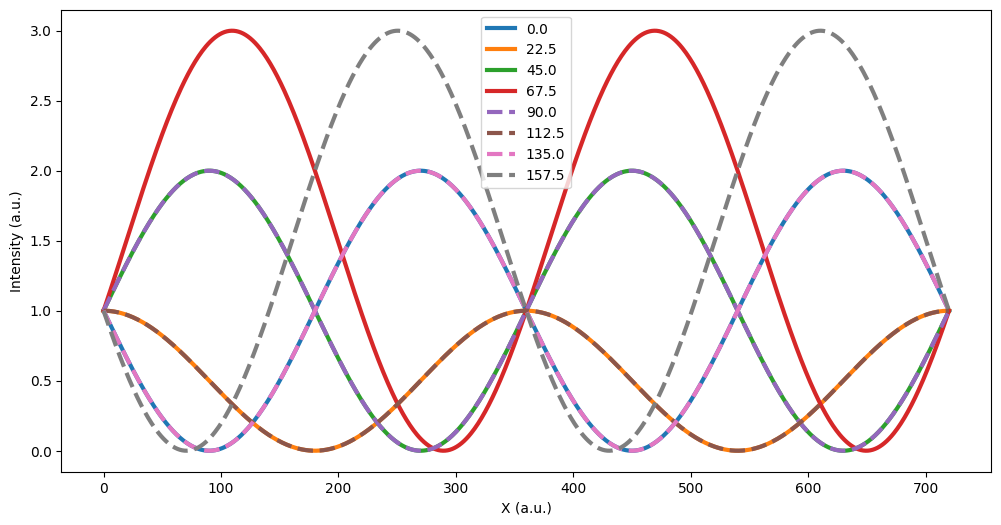

In [2]:
# Parametros
Nfases = 2
Nangles = 8
Ret = 90*degrees
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
Q1 = Jones_matrix().retarder_linear(R=Ret, azimuth=Angles)
Q2 = Q1.reciprocal(keep=True)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)

E1f = P * Q1 * E1
E2f = P * Q2 * E2
Efinal = E1f + E2f

I = Efinal.parameters.intensity()
plt.figure(figsize=(12,6))
for ind in range(Nangles):
    ls = "-" if ind < Nangles/2 else "--"
    plt.plot(I[:,ind], linestyle=ls, linewidth=3)
plt.xlabel("X (a.u.)")
plt.ylabel("Intensity (a.u.)")
plt.legend(legend)

mins = I[45:405, :].argmin(axis=0) + 45
maxs = I[45:405, :].argmax(axis=0) + 45

print("Minimos: ", mins)
print("Maximos: ", maxs)



Minimos:  [ 90 180 270 289 270 180  90  71]
Maximos:  [270 360  90 109  90 360 270 251]


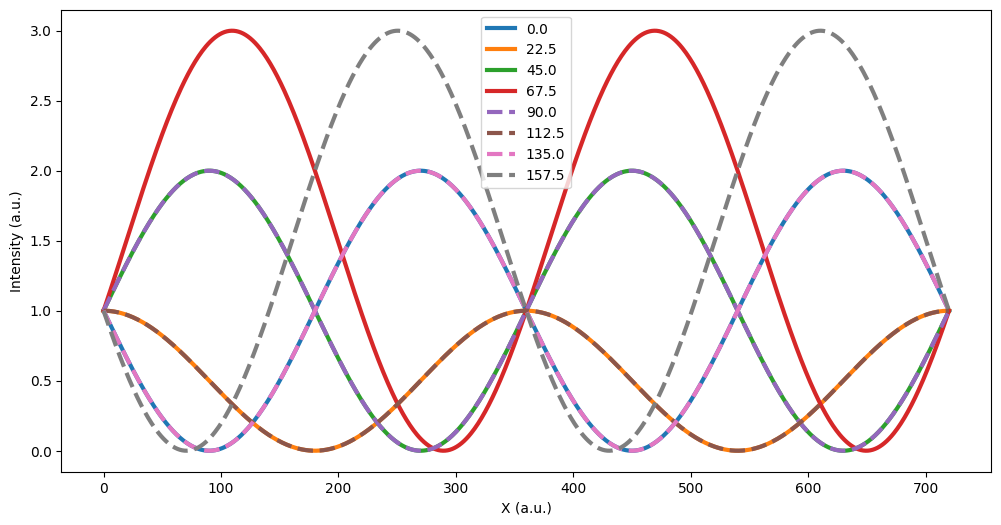

In [12]:
# Parametros
Nfases = 2
Nangles = 8
Ret = 90*degrees
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
Q1 = Jones_matrix().retarder_linear(R=Ret, azimuth=Angles)
Q2 = Jones_matrix().retarder_linear(R=Ret, azimuth=np.pi - Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)

E1f = P * Q1 * E1
E2f = P * Q2 * E2
Efinal = E1f + E2f

I = Efinal.parameters.intensity()
plt.figure(figsize=(12,6))
for ind in range(Nangles):
    ls = "-" if ind < Nangles/2 else "--"
    plt.plot(I[:,ind], linestyle=ls, linewidth=3)
plt.xlabel("X (a.u.)")
plt.ylabel("Intensity (a.u.)")
plt.legend(legend)

mins = I[45:405, :].argmin(axis=0) + 45
maxs = I[45:405, :].argmax(axis=0) + 45

print("Minimos: ", mins)
print("Maximos: ", maxs)



Text(0.5, 1.0, 'Intensity (a.u.)')

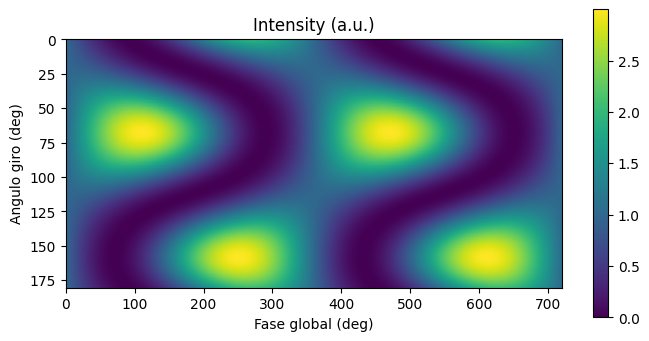

In [11]:
# Parametros
Nfases = 2
Nangles = 181
Ret = 90*degrees
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
Q1 = Jones_matrix().retarder_linear(R=Ret, azimuth=Angles)
Q2 = Q1.reciprocal(keep=True)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)

E1f = P * Q1 * E1
E2f = P * Q2 * E2
Efinal = E1f + E2f

I = Efinal.parameters.intensity()

plt.figure(figsize=(8,4))
plt.imshow(I.T, aspect=2)
plt.colorbar()
plt.xlabel("Fase global (deg)")
plt.ylabel("Angulo giro (deg)")
plt.title("Intensity (a.u.)")



Perfecto!!!

# Maximos y minimos

Los maximos y minimos de difracción siguen una ecuación que depende del ángulo de giro y 